### Loading the dataset (10 classes out of 101) ###


In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip # homepage

import zipfile

file_zip = zipfile.ZipFile('10_food_classes_all_data.zip')
file_zip.extractall()
file_zip.close()

--2023-06-16 08:55:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 142.250.99.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  88.8MB/s    in 4.6s    

2023-06-16 08:55:07 (108 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



### Exploring the Dataset ###

In [ ]:
import os
import pathlib

# Check class names
path = pathlib.Path('10_food_classes_all_data/train')
class_names = [item.name for item in path.glob('*')]
print(class_names)

['chicken_curry', 'ice_cream', 'sushi', 'hamburger', 'fried_rice', 'chicken_wings', 'steak', 'grilled_salmon', 'ramen', 'pizza']


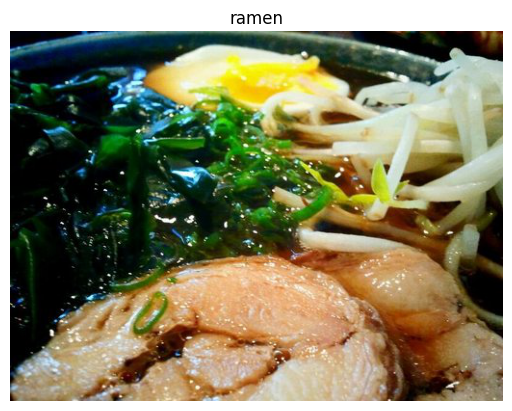

In [ ]:
# Plot random image
import matplotlib.pyplot as plt
import matplotlib.image as img
import random

path = '10_food_classes_all_data/train'
random_category = random.choice(os.listdir(path))
random_image_path = random.choice(os.listdir(path + '/' + random_category))

random_image_path_full = path + '/' + random_category + '/' + random_image_path

random_image = img.imread(random_image_path_full)

plt.figure()
plt.imshow(random_image)
plt.title(random_category)
plt.axis('off')
plt.show()

### Preparing training and testing datasets ###

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

train_directory = '10_food_classes_all_data/train'
test_directory = '10_food_classes_all_data/test'

train_dataset = image_dataset_from_directory(
    directory = train_directory,
    batch_size = 32,
    image_size = (224, 224),
    shuffle = True,
    label_mode = 'categorical'
)
test_dataset =  image_dataset_from_directory(
    directory = test_directory,
    batch_size = 32,
    image_size = (224, 224),
    shuffle = False,
    label_mode = 'categorical'
)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Loading MobileNet feature vector ###

In [ ]:
import tensorflow_hub as hub

MobileNet = hub.KerasLayer(handle = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5",
               trainable = False,
               input_shape = (224, 224, 3))

### Building and training a model ###

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(scale = 1./255),
    MobileNet,
    tf.keras.layers.Dense(10, activation = 'softmax')
])


model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

history = model.fit(train_dataset,
          epochs = 5,
          validation_data = test_dataset,
          steps_per_epoch = len(train_dataset),
          validation_steps = len(test_dataset))

Epoch 1/5
235/235 [==============================] - 30s 95ms/step - loss: 0.8822 - accuracy: 0.7179 - val_loss: 0.4730 - val_accuracy: 0.8560
Epoch 2/5
235/235 [==============================] - 22s 93ms/step - loss: 0.5314 - accuracy: 0.8291 - val_loss: 0.4364 - val_accuracy: 0.8612
Epoch 3/5
235/235 [==============================] - 24s 99ms/step - loss: 0.4485 - accuracy: 0.8567 - val_loss: 0.4117 - val_accuracy: 0.8712
Epoch 4/5
235/235 [==============================] - 23s 97ms/step - loss: 0.3942 - accuracy: 0.8757 - val_loss: 0.4039 - val_accuracy: 0.8708
Epoch 5/5
235/235 [==============================] - 21s 88ms/step - loss: 0.3544 - accuracy: 0.8884 - val_loss: 0.4105 - val_accuracy: 0.8716


### Plotting loss and accuracy ###

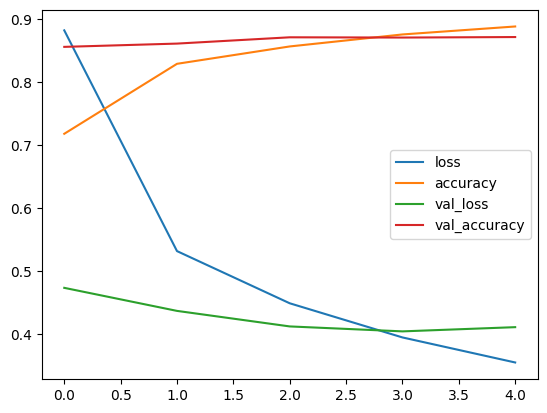

In [ ]:
import pandas as pd

results = pd.DataFrame(history.history).plot()